In [2]:
print("Hello world")

Hello world


# Descripción del dataset

Usando el conjunto de datos de [food-101](https://www.kaggle.com/datasets/dansbecker/food-101) que nos presenta un archivo comprimido con miles de imágenes de comidas comunes. 

En el siguiente apartado se quiere buscar la dirección de la imágen según el orden de los directorios que se manejan de la siguiente forma ***Comida*/*número del archivo***. Se busca tomar los primeros 4 una vez que se haya usado el método *shuffle* que busca reordenar el arreglo de forma aleatoria


In [13]:
import os, time
from random import shuffle

PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line)
    shuffle(IMG_NAMES)
    IMG_NAMES = IMG_NAMES[:4]
        

Extracting data...


## Extracción de las imagenes

Por medio de la extracción del nombre de las imágenes en el proceso anterior las pasamos por la función *imread* de la librería *cv2* que nos permitirá leer las imágenes y tenerlas en un arreglo para su posterior presentación con la librería **matplotlib**

In [14]:
from matplotlib import image, pyplot as plt
import cv2
images = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{img[:-1]}.jpg') for img in IMG_NAMES]

Text(0.5, 0, 'ceviche')

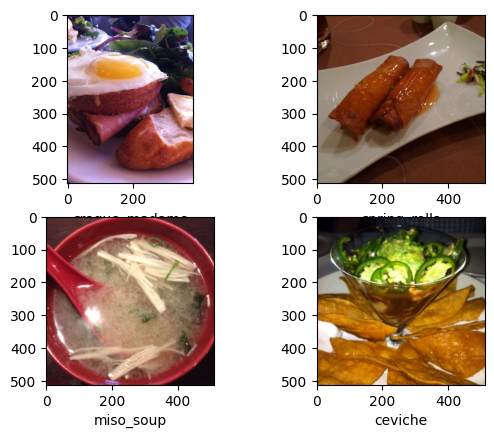

In [17]:
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[0].split("/")[0])
plt.margins(y=10)

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[1].split("/")[0])

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[2].split("/")[0])

plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[3].split("/")[0])